In [2]:
#1-modules
from IPython.display import Image
import os
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import matplotlib.tri as tri

In [9]:
#2-settings (file handling, title, figures)
data_dir = os.environ.get('OGS_DATA_DIR', '../../../Data')
fig_dir = "/home/ok/figures/"
ogs_bin_dir = "/home/ok/ogs-devs/build/release/bin/"
out_dir = os.environ.get('OGS_TESTRUNNER_OUT_DIR', '_out')
prj_name = "liakopoulos_TH2M"
pvd_name = "result_liakopoulos"
prj_file = f"{data_dir}/C/{prj_name}.prj"
prj_file_test = "liakopoulos_TH2M.prj"
vtu_mesh_file = "domain.vtu"
title = "H2M process: Liakopoulos benchmark"

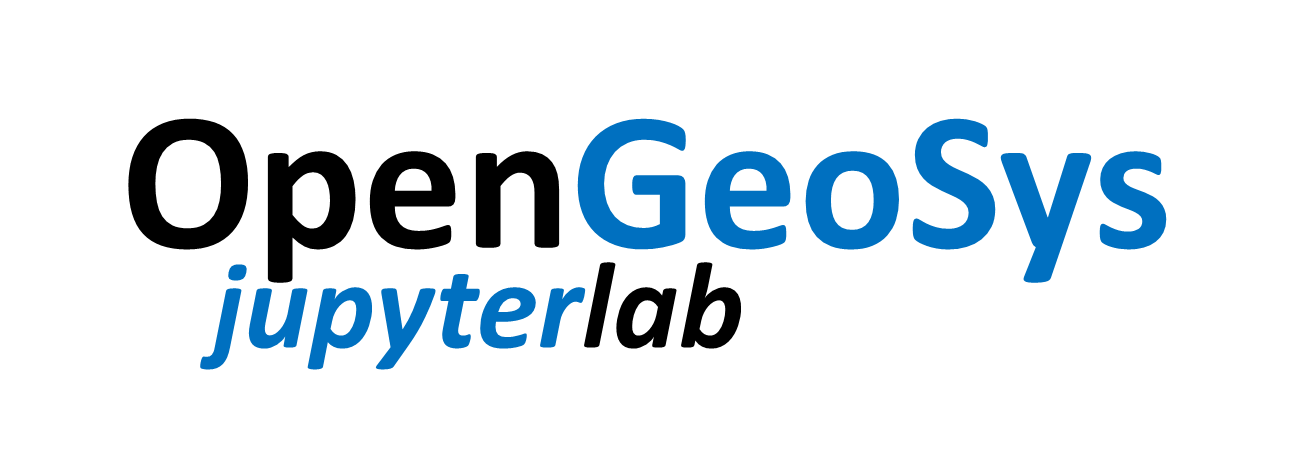

In [4]:
Image(filename = fig_dir + "ogs-jupyter-lab.png", width=150, height=100)

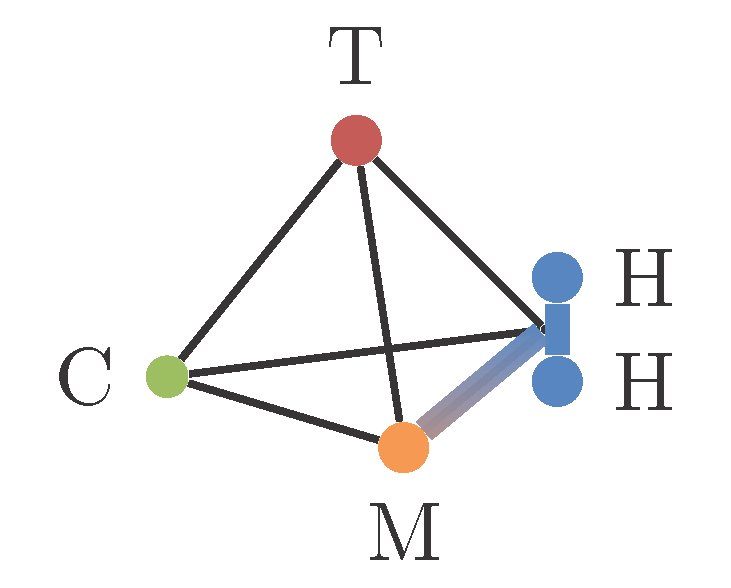

In [5]:
Image(filename = fig_dir + "h2m-tet.png", width=150, height=100)

In [6]:
#3-description (markdown)

## H2M process: Liakopoulos benchmark

**Problem description**

...

**Analytical solution**

...

**Numerical solution**

In [10]:
mesh = pv.read(vtu_mesh_file)
print("inspecting vtu_mesh_file")
mesh

inspecting vtu_mesh_file


UnstructuredGrid (0x7f651d4f4640)
  N Cells:	100
  N Points:	202
  X Bounds:	0.000e+00, 1.000e-01
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	2

inspecting mesh and initial conditions


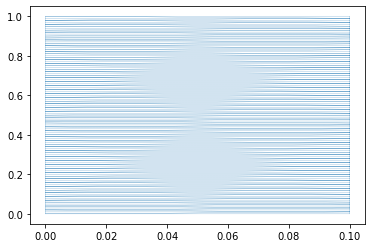

In [41]:
print("inspecting mesh and initial conditions")
#file
reader = vtk.vtkXMLUnstructuredGridReader()
reader.SetFileName(vtu_mesh_file)
reader.Update()  # Needed because of GetScalarRange
data = reader.GetOutput()
#ic-values: pressure = data.GetPointData().GetArray("OGS5_pressure")
#points
points = data.GetPoints()
npts = points.GetNumberOfPoints()
x = vtk_to_numpy(points.GetData())
triang = tri.Triangulation(x[:,0], x[:,1])
#plt.triplot(triang, 'go-', lw=1.0)
plt.triplot(triang,lw=0.2)
#plt.tricontour(triang, pressure, 16)

**Running OGS**

In [14]:
#run ogs
import time
t0 = time.time()
#print(f"ogs {prj_file} > out.txt")
print(f"{ogs_bin_dir}ogs {prj_file_test} > log.txt")
! {ogs_bin_dir}ogs {prj_file_test} > log.txt
tf = time.time()
print("computation time: ", round(tf - t0, 2), " s.")

/home/ok/ogs-devs/build/release/bin/ogs liakopoulos_TH2M.prj > log.txt
computation time:  33.25  s.


**Spatial Profiles**

[   0.  120.  300. 4800. 7200.]


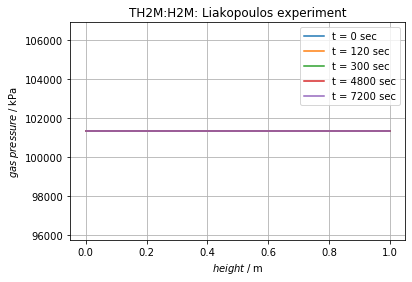

In [79]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
#Read simulation results
#pvdfile = vtuIO.PVDIO(f"{pvd_name}.pvd", dim=1)
pvdfile = vtuIO.PVDIO("result_liakopoulos.pvd", dim=1)
print(pvdfile.timesteps)
yaxis =  [(0,i,0) for i in np.linspace(start=0.0, stop=1.0, num=100)]
r_y = np.array(yaxis)[:,1]
time = [0,120,300,4800,7200]
variable = "gas_pressure"

for t in time:
    pressure_yaxis_t = pvdfile.read_set_data(t, variable, data_type="point", pointsetarray=yaxis)
    plt.plot(r_y, pressure_yaxis_t, label='t = '+str(t)+' sec')
titlestring = "TH2M:H2M: Liakopoulos experiment"
plt.title(titlestring)
plt.xlabel(r'$height\;/\;\mathrm{m}$')
plt.ylabel(r'$gas\;pressure\;/\;\mathrm{kPa}$')
plt.legend()
plt.grid()
plt.savefig(f"{prj_name}.png")
plt.show()

**Temporal Profiles**

**Contour plots**

Vertical cross-section


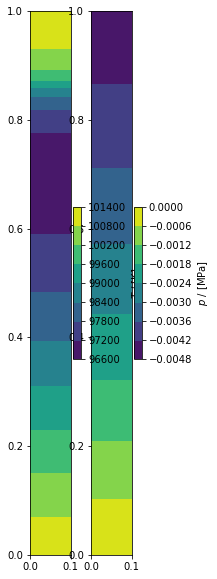

In [59]:
theme = "Vertical cross-section"
print(theme)
import matplotlib.tri as tri
file_vtu = "result_liakopoulos_t_7200.vtu"
m_plot=vtuIO.VTUIO(file_vtu, dim=2)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
u_plot = m_plot.get_point_field("gas_pressure")
p_plot = m_plot.get_point_field("displacement").T[1]
fig, ax = plt.subplots(ncols=2, figsize=(2,10))
contour_left = ax[0].tricontourf(triang, u_plot)
contour_right = ax[1].tricontourf(triang, p_plot)
fig.colorbar(contour_left,ax=ax[0],label='$T$ / [K]')
fig.colorbar(contour_right,ax=ax[1],label='$p$ / [MPa]')
plt.show()

In [13]:
import time
print(time.ctime())

Thu Aug  4 15:15:01 2022


**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/liakopoulos_TH2M.prj

In [ ]:
**Credits**
- Wenqing Wang for set-up the OGS benchmark, https://www.opengeosys.org/docs/benchmarks/liquid-flow/liquid-flow-theis-problem/
- Jörg Buchwald for ogs6py and VTUInterface, https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc